# Projeto 1 - Ciência dos Dados#

Nome: Daniel Minson Pucciariello


## Perguntas a serem respondidas

Esse projeto tem como objetivo analisar como a ação da UNAIDS em países em que atua desde 1996, momento em que foi fundada, vem alterando a vida da população desses países. Mais precisamente, ele pretende responder às seguintes perguntas:

A ação da agencia internacional ocasionou uma diminuição significativa no índice de mortes por AIDS, no índice de novas pessoas com AIDS e no número de pessoas que vivem com AIDS?
A ação da agencia internacional pode ter ocasionado uma melhora sigificativa na condição de saúde dos países em que atua e aumentado a expectativa de vida dos países?
A ação da agencia internacional foi eficiente (partindo de 2005) quando se trata de diminuir o número de mortes relativas?


## Explicação da hipótese e mecanismo


Anteriormente ao estudo ser realizado, se espera que a ação da UNAIDS tenha levado à uma redução significativa na taxa de mortalidade por AIDS e no número de pessoas que vive com AIDS. Se entende que uma comparação entre dados de gastos com saúde (muitas vezes maiores devido à doações internacionais muitas vezes fomentadas pela ação da UNAIDS) e a diminuição da porcentagem de mortes por AIDS possa atestar a eficiencia (ou não) da ação desse orgão internacional.

## Bases de dados usadas

LINKS (ainda faltam alguns dados):

Adultos com HIV - https://docs.google.com/spreadsheet/pub?key=pyj6tScZqmEfbZyl0qjbiRQ&output=xlsx

IDH - https://docs.google.com/spreadsheet/pub?key=tyadrylIpQ1K_iHP407374Q&output=xlsx

População total - https://docs.google.com/spreadsheet/pub?key=phAwcNAVuyj0XOoBL_n5tAQ&output=xlsx

Expectativa de vida - https://docs.google.com/spreadsheet/pub?key=phAwcNAVuyj2tPLxKvvnNPA&output=xlsx

Novas Infecções por AIDS (2019) - regional (Sul e Oeste da África) - https://aidsinfo.unaids.org/?did=556c5013a60b051e114e2ff8&r=world&t=null&tb=g&bt=grli&ts=0,0&gid=556c5013a60b051e114e2ff8,556c578aa60b051e114e2ffb&gr=UNAESA

Dados de novas infecções em 2017 - https://aidsinfo.unaids.org?did=554c9b9c05b5b281750af202&r=world&t=null&tb=c&bt=undefined&ts=&cl=AGO,BWA,COM,ERI,ETH,KEN,LSO,MDG,MWI,MUS,MOZ,NAM,RWA,ZAF,SSD,SWZ,UGA,TZA,ZMB,ZWE&cr=n&ct=2017&cav=Population

In [4]:
%matplotlib inline
import pandas as pd
import numpy as np
import math as math
from scipy import stats
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [31]:
deaths = pd.read_excel("Indicator_Annual number of AIDS deaths.xlsx")
peoplewithaids = pd.read_excel("indicator_hiv_plwha.xlsx")
expectativadevida = pd.read_excel('indicator life_expectancy_at_birth.xlsx')
pibpercapita = pd.read_excel('indicator gapminder gdp_per_capita_ppp.xlsx')
newlyinfected = pd.read_excel('Indicator_Estimated new HIV cases All ages.xlsx')
totalpopulation = pd.read_excel("indicator gapminder population.xlsx")
#https://aidsinfo.unaids.org/
newlyinfected_south_eastern_africa_2018 = pd.read_excel("New HIV infections_Number of new HIV infections_Population_2018.xlsx")
newlyinfected_south_eastern_africa_2017 =pd.read_excel("New HIV infections_Number of new HIV infections_Population_2017.xlsx")
receivingART_south_eastern_africa_2017 = pd.read_excel("Treatment cascade_People living with HIV receiving ART (#)_Population_ All ages_2017.xlsx")
receivingART_south_eastern_africa_2018 = pd.read_excel("Treatment cascade_People living with HIV receiving ART (#)_Population_ All ages_2018.xlsx")
livingwithHIV2017 = pd.read_excel("People living with HIV 2017.xlsx")
livingwithHIV2018 = pd.read_excel("People living with HIV 2018.xlsx")

**Mudando os índices, renomeando colunas e limpando dados:**

In [33]:
deaths=deaths.rename(columns = {"Annual number of AIDS deaths":'Mortes por AIDS'})
deaths_idx=deaths.set_index("Mortes por AIDS")
deaths_idx.columns = deaths_idx.columns.astype(int)
deaths_idx=deaths_idx.dropna()

peoplewithaids=peoplewithaids.rename(columns = {"People living with HIV":'Pessoas vivendo com HIV', "1996": 1996, "2001":2001})
peoplewithaids_idx=peoplewithaids.set_index("Pessoas vivendo com HIV")
peoplewithaids_idx=peoplewithaids_idx.dropna()

expectativadevida=expectativadevida.rename(columns={"Life expectancy":"Expectativa de vida"})
expectativadevida_idx=expectativadevida.set_index("Expectativa de vida")
expectativadevida_idx=expectativadevida_idx.dropna()

pibpercapita=pibpercapita.rename(columns={"GDP per capita":"PIB per capita"})
pibpercapita_idx=pibpercapita.set_index("PIB per capita")
pibpercapita_idx=pibpercapita_idx.dropna()

totalpopulation=totalpopulation.rename(columns={"Total population":"População total"})
totalpopulation_idx=totalpopulation.set_index("População total")
totalpopulation_idx=totalpopulation_idx.dropna()

newlyinfected_south_eastern_africa_2017=newlyinfected_south_eastern_africa_2017.rename(columns={"Selected Regions":"Países", "For The Year 2017":"Novos infectados em 2017"})
newlyinfected_south_eastern_africa_idx2017=newlyinfected_south_eastern_africa_2017.set_index("Países")

newlyinfected_south_eastern_africa_2018=newlyinfected_south_eastern_africa_2018.rename(columns={"Selected Regions":"Países", "For The Year 2018":"Novos infectados em 2018"})
newlyinfected_south_eastern_africa_idx2018=newlyinfected_south_eastern_africa_2018.set_index("Países")

receivingART_south_eastern_africa_2017=receivingART_south_eastern_africa_2017.rename(columns={"Selected Regions":"Países", "For The Year 2017":"Recebendo ART em 2017"})
receivingART_south_eastern_africa_idx2017=receivingART_south_eastern_africa_2017.set_index("Países")

receivingART_south_eastern_africa_2018=receivingART_south_eastern_africa_2018.rename(columns={"Selected Regions":"Países", "For The Year 2018":"Recebendo ART em 2018"})
receivingART_south_eastern_africa_idx2018=receivingART_south_eastern_africa_2018.set_index("Países")

livingwithHIV2017=livingwithHIV2017.rename(columns={"Selected Regions":"Países", "For The Year 2017":"Pessoas com HIV em 2017"})
livingwithHIV2017_idx=livingwithHIV2017.set_index("Países")

livingwithHIV2018=livingwithHIV2018.rename(columns={"Selected Regions":"Países", "For The Year 2018":"Pessoas com HIV em 2018"})
livingwithHIV2018_idx=livingwithHIV2018.set_index("Países")

**Estudo dos dados a cada 5 anos, sendo 5 anteriores e 5 posteriores ào começo da organização:**

In [15]:
deaths_5_anos=deaths_idx.loc[:,[1991, 1996, 2001]]
peoplewithaids_5_anos=peoplewithaids_idx.loc[:,[1991, 1996, 2001]]
expectativadevida_5_anos=expectativadevida_idx.loc[:,[1991, 1996, 2001]]
pibpercapita_5_anos =pibpercapita_idx.loc[:,[1991, 1996, 2001]]
newlyinfected_5_anos =newlyinfected_idx.loc[:,[1991, 1996, 2001]]
totalpopulation_5_anos = totalpopulation_idx.loc[:,[1991, 1996, 2001]]

**Comparação da taxa de mortes por HIV, de 5 em 5 anos:**

In [16]:
deaths_5_anos.head()

,1991,1996,2001
Mortes por AIDS,,,
Afghanistan,60.0,150.0,150.0
Armenia,60.0,60.0,150.0
Australia,600.0,600.0,150.0
Austria,60.0,60.0,60.0
Azerbaijan,60.0,60.0,150.0


**Comparação da quantidade de pessoas que vivem com HIV, de 5 anos em 5 anos:**

In [17]:
peoplewithaids_5_anos.head()

,1991,1996,2001
Pessoas vivendo com HIV,,,
Afghanistan,600.0,1400.0,2000.0
Angola,39000.0,80000.0,130000.0
Argentina,31000.0,51000.0,66000.0
Armenia,600.0,1600.0,3500.0
Australia,12000.0,11000.0,13000.0


**Comparação da quantidade de novas pessoas infectadas com AIDS, de 5 anos em 5 anos:**

In [18]:
newlyinfected_5_anos.head()

,1991,1996,2001
Incidencia de HIV em novas pessoas,,,
Angola,8500.0,15000.0,20000.0
Bahamas,750.0,750.0,750.0
Bangladesh,160.0,160.0,350.0
Barbados,160.0,160.0,160.0
Belarus,60.0,160.0,2100.0


**Comparação da expectativa de vida, de 5 anos em 5 anos:**

In [19]:
expectativadevida_5_anos.head()

,1991,1996,2001
Expectativa de vida,,,
Afghanistan,49.3,49.7,50.4
Albania,73.4,73.8,75.1
Algeria,70.5,72.1,73.5
American Samoa,70.2,70.7,71.7
Andorra,81.8,82.8,83.9


**Comparação da população de cada país, de 5 anos em 5 anos:**

In [20]:
totalpopulation_5_anos.head()

,1991,1996,2001
População total,,,
Afghanistan,12789374.0,17481800.0,20531160.0
Albania,3275438.0,3092034.0,3124093.0
Algeria,26554277.0,29411839.0,31590320.0
American Samoa,48379.0,53926.0,58176.0
Andorra,56674.0,64291.0,67770.0


**Comparação do número de pessoas com AIDS, mortes por AIDS e expectativa de vida em cada um dos países**

In [21]:
pessoascomaids_mortesporaids= peoplewithaids_5_anos.join(deaths_5_anos, how="inner", lsuffix ="_people_w_hiv", rsuffix = "_mortesporaids")

In [22]:
expectativadevida_5_anos_suffix=expectativadevida_5_anos.add_suffix('_expectativadevida')
pessoascomaids_mortesporaids_expectativadevida=pessoascomaids_mortesporaids.join(expectativadevida_5_anos_suffix, how="inner")
pessoascomaids_mortesporaids_expectativadevida.head()

,1991_people_w_hiv,1996_people_w_hiv,2001_people_w_hiv,1991_mortesporaids,1996_mortesporaids,2001_mortesporaids,1991_expectativadevida,1996_expectativadevida,2001_expectativadevida
Afghanistan,600.0,1400.0,2000.0,60.0,150.0,150.0,49.3,49.7,50.4
Armenia,600.0,1600.0,3500.0,60.0,60.0,150.0,69.7,69.4,71.4
Australia,12000.0,11000.0,13000.0,600.0,600.0,150.0,77.4,78.5,80.1
Austria,600.0,2300.0,5500.0,60.0,60.0,60.0,75.8,77.1,78.6
Azerbaijan,160.0,600.0,3000.0,60.0,60.0,150.0,65.3,65.0,67.2


**Junção de várias tabelas - apresenta número de pessoas vivendo com AIDS, o número de pessoas mortas por AIDS, número de novos infectados e a população mundial naquele momento, além de dados como PIB per cápita e IDH**

In [25]:
suffix_newlyinfected_5_anos= newlyinfected_5_anos.add_suffix('_novosinfectados')
suffix_totalpopulation_5_anos=totalpopulation_5_anos.add_suffix('_população_total')
juncaodosdados=pessoascomaids_mortesporaids.join(suffix_newlyinfected_5_anos, how="inner")
juncaodosdados=juncaodosdados.join(suffix_totalpopulation_5_anos, how="inner")

## Análise de dados

Insira abaixo uma análise de dados tratada para ter maior clareza. 

Lembre-se de que, além deste arquivo principal, você precisa entregar um ou mais *notebooks* mais brutos com todas as tentativas que fez e que não deram certo .

**Não inclua dados ou gráficos sem motivação nem interpretação** - sempre que fizer uma análise, plot ou tablea, diga qual sua intenção. Logo após a apresentação diga qual conclusão específica ou interpretação você tira daquela análise

**Gráfico de comportamento do comportamento de valores absolutos médios acerca da quantidade de pessoas com AIDS com o passar do anos**



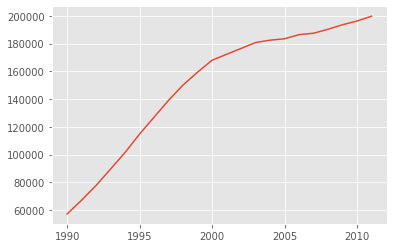

In [17]:
plt.plot(peoplewithaids_idx.mean().index, peoplewithaids_idx.mean())

**Gráfico de comportamento relativo ao longo dos anos - PESSOAS COM AIDS**

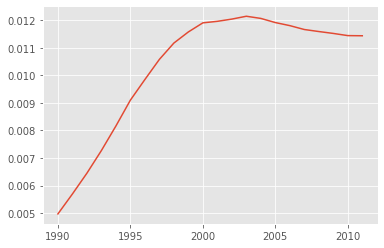

In [18]:
#plt.plot(peoplewithaids_idx.mean().index, peoplewithaids_idx.mean())
peoplewithaids_kkk = peoplewithaids_idx.apply(pd.to_numeric)
totalpopulation_kkk = totalpopulation_idx.apply(pd.to_numeric)
peoplewithaids_kkk.columns = peoplewithaids_kkk.columns.astype(int)
totalpopulation_kkk.columns = totalpopulation_kkk.columns.astype(int)

#peoplewithaids_kkk[2002]
comportamentorelativo_peoplewithaids= peoplewithaids_kkk/totalpopulation_kkk

plt.plot(comportamentorelativo_peoplewithaids.mean().index, comportamentorelativo_peoplewithaids.mean())

**Gráfico de comportamento das mortes absolutas ao longo dos anos**



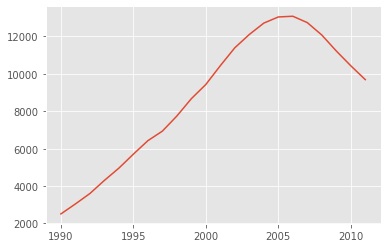

In [19]:
deaths_kkk = deaths_idx.apply(pd.to_numeric)
deaths_kkk.columns = deaths_kkk.columns.astype(int)

#testandosamerda[testandosamerda.columns[0:15]]
#peoplewithaids_kkk[2002]
comportamentorelativo_mortes= deaths_kkk/totalpopulation_kkk

plt.plot(deaths_kkk.mean().index, deaths_kkk.mean())

**Comportamento relativo médio - MORTE - todos os países**

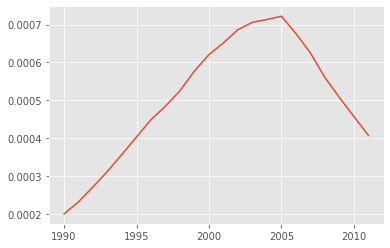

In [20]:
plt.plot(comportamentorelativo_mortes.mean().index, comportamentorelativo_mortes.mean())


**Gráfico de comportamento de novos infectados ao longo dos anos**



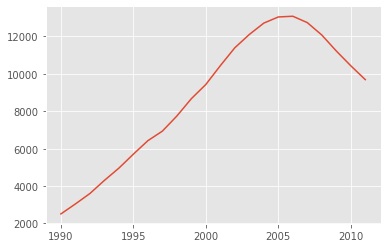

In [21]:
newlyinfected_idx = newlyinfected_idx.apply(pd.to_numeric)
newlyinfected_idx.columns = newlyinfected_idx.columns.astype(int)

#testandosamerda[testandosamerda.columns[0:15]]
comportamentorelativo_novosinfectados= newlyinfected_idx/totalpopulation_kkk

plt.plot(newlyinfected_idx.mean().index, deaths_kkk.mean())

**Comportamento relativo médio - NOVAS INFECÇÕES - todos os países**

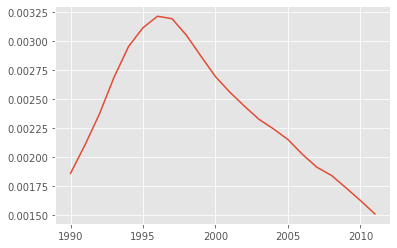

In [22]:
plt.plot(comportamentorelativo_novosinfectados.mean().index, comportamentorelativo_novosinfectados.mean())

In [35]:
juncaodosdados=receivingART_south_eastern_africa_idx2017.join(receivingART_south_eastern_africa_idx2018, how="inner")
juncaodosdados=juncaodosdados.join(newlyinfected_south_eastern_africa_idx2017, how="inner")
juncaodosdados=juncaodosdados.join(newlyinfected_south_eastern_africa_idx2018, how="inner")
juncaodosdados=juncaodosdados.join(livingwithHIV2017_idx, how="inner")
juncaodosdados=juncaodosdados.join(livingwithHIV2018_idx, how="inner")
juncaodosdados.head()

,Recebendo ART em 2017,Recebendo ART em 2018,Novos infectados em 2017,Novos infectados em 2018,Pessoas com HIV em 2017,Pessoas com HIV em 2018
Países,,,,,,
Angola,78721,88734,29000,28000,320000,330000
Botswana,285983,307377,9000,8500,370000,370000
Comoros,95,96,0,0,120,120
Eritrea,8795,8907,610,580,18000,18000
Ethiopia,437555,449962,23000,23000,680000,690000


In [37]:
listapaises_analise = ['Angola',  'Ethiopia',  'Kenya',  'Lesotho',    'Malawi', 'Namibia',  'Rwanda', 'South Africa',  'Uganda',   'Zimbabwe', 'Madagascar','Mauritius','Sudan']
selftest_not_available=["Angola", "Ethiopia", "Rwanda", 'Uganda', 'Zambia','Botswana',]

juncaodosdados["livingwithHIV2017_idx"] = livingwithHIV2017_idx
juncaodosdados["livingwithHIV2018_idx"] = livingwithHIV2018_idx

juncaodosdados.loc[:, "selftestavailable"] = "sim"
juncaodosdados.loc[selftest_not_available, "selftestavailable"] = "não"
juncaodosdados.head()

,Recebendo ART em 2017,Recebendo ART em 2018,Novos infectados em 2017,Novos infectados em 2018,Pessoas com HIV em 2017,Pessoas com HIV em 2018,livingwithHIV2017_idx,livingwithHIV2018_idx,selftestavailable
Países,,,,,,,,,
Angola,78721,88734,29000,28000,320000,330000,320000,330000,não
Botswana,285983,307377,9000,8500,370000,370000,370000,370000,não
Comoros,95,96,0,0,120,120,120,120,sim
Eritrea,8795,8907,610,580,18000,18000,18000,18000,sim
Ethiopia,437555,449962,23000,23000,680000,690000,680000,690000,não


## Conclusão

Responda à pergunta, argumento da melhor forma possível com base nos dados